<a href="https://colab.research.google.com/github/angelbabu123/my-first-project/blob/main/Welcome_To_Colab_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker pandas mysql-connector-python streamlit


In [ ]:
from faker import Faker
import pandas as pd
import random
from datetime import datetime


In [ ]:
fake = Faker()


In [ ]:
categories = ["Food", "Travel", "Groceries", "Bills", "Shopping",
              "Entertainment", "Medical", "Subscription", "Gifts"]

modes = ["Cash", "Online"]


In [ ]:
def generate_month(month, year=2024, n=250):
    data = []
    for _ in range(n):
        date = fake.date_between(start_date=f"{year}-{month}-01",
                                 end_date=f"{year}-{month}-28")

        category = random.choice(categories)
        payment = random.choice(modes)
        amount = round(random.uniform(50, 5000), 2)
        cashback = round(random.uniform(0, 200), 2) if random.choice([True, False]) else 0

        data.append([date, category, payment, fake.sentence(), amount, cashback])

    df = pd.DataFrame(data, columns=["Date", "Category", "Payment_Mode",
                                     "Description", "Amount_Paid", "Cashback"])
    return df


In [ ]:
# Run once in Colab / local environment if needed
!pip install Faker pandas


In [ ]:
# Complete, robust data-generation code (use this block)
from faker import Faker
import pandas as pd
import random
from datetime import datetime, date
import calendar
import os

fake = Faker()
random.seed(42)
Faker.seed(42)

# Categories and payment modes (adjust as needed)
categories = ["Food", "Travel", "Groceries", "Bills", "Shopping",
              "Entertainment", "Medical", "Subscription", "Gifts"]
modes = ["Cash", "Online"]

def generate_month(month, year=2024, n=250):
    """
    Generate n fake transactions for the given month/year.
    Returns a pandas DataFrame.
    """
    data = []
    # get last day of this month (handles leap years etc.)
    last_day = calendar.monthrange(year, month)[1]
    start_date = date(year, month, 1)
    end_date = date(year, month, last_day)

    for _ in range(n):
        # use faker's date_between but pass date objects to avoid parsing
        tx_date = fake.date_between(start_date=start_date, end_date=end_date)

        category = random.choice(categories)
        payment = random.choice(modes)
        amount = round(random.uniform(50, 5000), 2)
        cashback = round(random.uniform(0, 200), 2) if random.choice([True, False]) else 0.0
        description = fake.sentence(nb_words=6)

        data.append({
            "Date": tx_date,
            "Category": category,
            "Payment_Mode": payment,
            "Description": description,
            "Amount_Paid": amount,
            "Cashback": cashback
        })

    df = pd.DataFrame(data)
    return df

# Output directory
out_dir = "expense_csvs"
os.makedirs(out_dir, exist_ok=True)

# Generate 12 months and save
for m in range(1, 13):
    try:
        df = generate_month(m, year=2024, n=250)
        filename = os.path.join(out_dir, f"Expense_{str(m).zfill(2)}_2024.csv")
        df.to_csv(filename, index=False)
        print(f"Saved: {filename}  (rows: {len(df)})")
    except Exception as e:
        print(f"ERROR for month {m}: {e}")

# Quick preview of one generated file
sample = pd.read_csv(os.path.join(out_dir, "Expense_01_2024.csv"))
print("\nSample rows:\n", sample.head())


Saved: expense_csvs/Expense_01_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_02_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_03_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_04_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_05_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_06_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_07_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_08_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_09_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_10_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_11_2024.csv  (rows: 250)
Saved: expense_csvs/Expense_12_2024.csv  (rows: 250)

Sample rows:
          Date Category Payment_Mode  \
0  2024-01-20   Travel         Cash   
1  2024-01-04   Travel         Cash   
2  2024-01-20    Bills         Cash   
3  2024-01-09    Gifts       Online   
4  2024-01-19     Food         Cash   

                                         Description  Amount_Paid  Cashback  
0                                  S

In [ ]:
from google.colab import files

files.download('expense_csvs/Expense_01_2024.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit pyngrok pandas


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="CSV Visualizer", layout="wide")
st.title("📊 CSV File Visualizer")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("✅ File uploaded successfully!")
    st.dataframe(df.head())

    st.subheader("📈 Data Summary")
    st.write(df.describe())

    st.subheader("📉 Column-wise Chart")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) > 0:
        column = st.selectbox("Select a numeric column", numeric_cols)
        st.line_chart(df[column])
    else:
        st.warning("No numeric columns found for visualization.")


Writing app.py


In [ ]:
!npm install -g localtunnel
!streamlit run app.py & npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧

⠇⠏⠋⠙⠹⠸⠼⠴⠦your url is: https://all-llamas-sort.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.153.155:8501



In [ ]:
!pip install streamlit pyngrok mysql-connector-python


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")


In [ ]:
%%writefile app.py
import streamlit as st
st.title("Hello from Streamlit in Google Colab")
st.write("This app is running using ngrok!")


Overwriting app.py


In [ ]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
!pip install streamlit pyngrok


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("35R6Lq78VrFpmjie1obCX9Bagyu_3mdujZ2vT1PFw7ompE8YW")


In [ ]:
%%writefile app.py
import streamlit as st

st.title("Streamlit Running in Google Colab")
st.write("Hello Angelu ❤️")


Overwriting app.py


In [ ]:
!nohup streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &


nohup: appending output to 'nohup.out'


In [ ]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://somer-unabasing-daniell.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
!ps -ef | grep streamlit


root       38202       1  7 15:29 ?        00:00:02 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.address 0.0.0.0
root       38329     168  0 15:30 ?        00:00:00 /bin/bash -c ps -ef | grep streamlit
root       38331   38329  0 15:30 ?        00:00:00 grep streamlit


In [ ]:
!nohup streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &


nohup: appending output to 'nohup.out'


In [ ]:
!pip install mysql-connector-python
import pandas as pd
import mysql.connector


In [ ]:
def run_query(query):
    connection = mysql.connector.connect(
        host="YOUR_HOST",
        user="YOUR_USERNAME",
        password="YOUR_PASSWORD",
        database="YOUR_DATABASE"
    )
    cursor = connection.cursor(dictionary=True)
    cursor.execute(query)
    result = cursor.fetchall()
    connection.close()
    return pd.DataFrame(result)


In [ ]:
 from google.colab import files
files.upload()


Saving Expense_01_2024.csv.csv to Expense_01_2024.csv (1).csv


{'Expense_01_2024.csv (1).csv': b'\xef\xbb\xbfDate,Category,Payment_Mode,Description,Amount_Paid,Cashback\r\n1/20/2024,Travel,Cash,Score each cause.,3720.67,44.64\r\n1/4/2024,Travel,Cash,Beautiful instead ahead despite measure ago current.,2972.94,5.96\r\n1/20/2024,Bills,Cash,Information last everything thank serve civil institution.,2551.51,112.25\r\n1/9/2024,Gifts,Online,Whatever from behavior benefit suggest.,1141.18,0\r\n1/19/2024,Food,Cash,Role movie win.,3505.79,0\r\n1/12/2024,Shopping,Cash,Fall pick those gun court attorney product.,1115.8,0\r\n1/24/2024,Travel,Cash,Talk term herself law.,1930.64,0\r\n1/26/2024,Entertainment,Online,Have decide environment view.,4045.28,0\r\n1/20/2024,Gifts,Cash,Play move each left establish understand read detail.,4866.92,0\r\n1/10/2024,Travel,Online,Director allow firm environment.,4155.55,0\r\n1/7/2024,Bills,Cash,Then fire pretty how trip learn enter.,276.83,154.61\r\n1/8/2024,Travel,Cash,Much section investment on gun young catch.,4339.09,0\r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.upload()


Saving Expense_01_2024.csv.csv to Expense_01_2024.csv (2).csv


{'Expense_01_2024.csv (2).csv': b'\xef\xbb\xbfDate,Category,Payment_Mode,Description,Amount_Paid,Cashback\r\n1/20/2024,Travel,Cash,Score each cause.,3720.67,44.64\r\n1/4/2024,Travel,Cash,Beautiful instead ahead despite measure ago current.,2972.94,5.96\r\n1/20/2024,Bills,Cash,Information last everything thank serve civil institution.,2551.51,112.25\r\n1/9/2024,Gifts,Online,Whatever from behavior benefit suggest.,1141.18,0\r\n1/19/2024,Food,Cash,Role movie win.,3505.79,0\r\n1/12/2024,Shopping,Cash,Fall pick those gun court attorney product.,1115.8,0\r\n1/24/2024,Travel,Cash,Talk term herself law.,1930.64,0\r\n1/26/2024,Entertainment,Online,Have decide environment view.,4045.28,0\r\n1/20/2024,Gifts,Cash,Play move each left establish understand read detail.,4866.92,0\r\n1/10/2024,Travel,Online,Director allow firm environment.,4155.55,0\r\n1/7/2024,Bills,Cash,Then fire pretty how trip learn enter.,276.83,154.61\r\n1/8/2024,Travel,Cash,Much section investment on gun young catch.,4339.09,0\r

In [ ]:
df = pd.read_csv("Expense_01_2024.csv (1).csv")
df.head()


,Date,Category,Payment_Mode,Description,Amount_Paid,Cashback
0,1/20/2024,Travel,Cash,Score each cause.,3720.67,44.64
1,1/4/2024,Travel,Cash,Beautiful instead ahead despite measure ago cu...,2972.94,5.96
2,1/20/2024,Bills,Cash,Information last everything thank serve civil ...,2551.51,112.25
3,1/9/2024,Gifts,Online,Whatever from behavior benefit suggest.,1141.18,0.00
4,1/19/2024,Food,Cash,Role movie win.,3505.79,0.00


In [ ]:
df.head()
df.tail()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Category      250 non-null    object 
 2   Payment_Mode  250 non-null    object 
 3   Description   250 non-null    object 
 4   Amount_Paid   250 non-null    float64
 5   Cashback      250 non-null    float64
dtypes: float64(2), object(4)
memory usage: 11.8+ KB


,Amount_Paid,Cashback
count,250.00000,250.000000
mean,2649.41496,46.974160
std,1380.40886,64.761081
min,123.56000,0.000000
25%,1432.51750,0.000000
50%,2730.54000,0.000000
75%,3747.78250,92.357500
max,4987.26000,199.980000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Net_Amount'] = df['Amount_Paid'] - df['Cashback']
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['DayOfWeek'] = df['Date'].dt.day_name()


In [ ]:
df.isnull().sum()


,0
Date,0
Category,0
Payment_Mode,0
Description,0
Amount_Paid,0
Cashback,0
Net_Amount,0
Day,0
Month,0
DayOfWeek,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


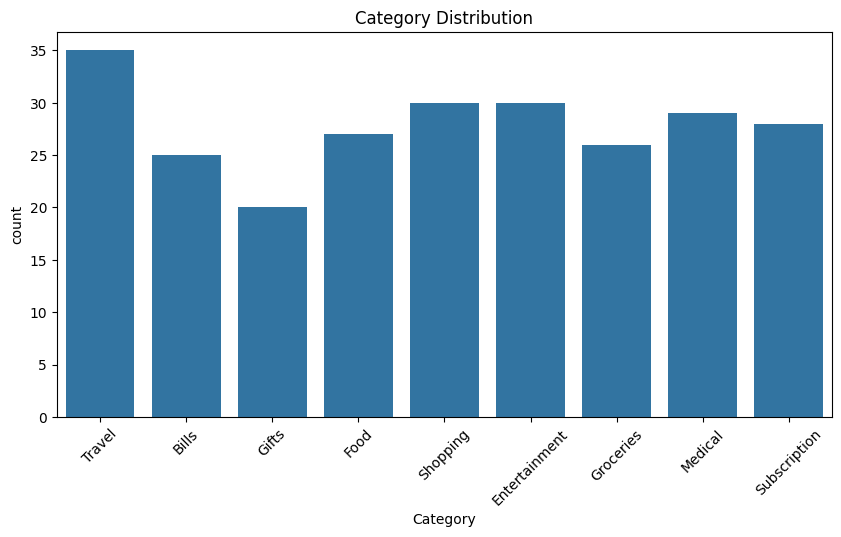

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()


In [ ]:
df['Payment_Mode'].value_counts()


,count
Payment_Mode,
Online,129
Cash,121


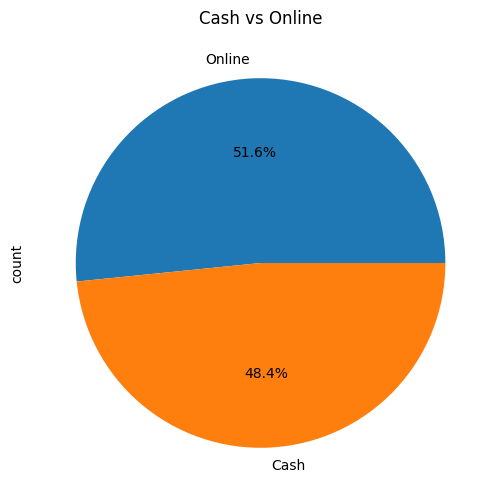

In [ ]:
df['Payment_Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Cash vs Online")
plt.show()


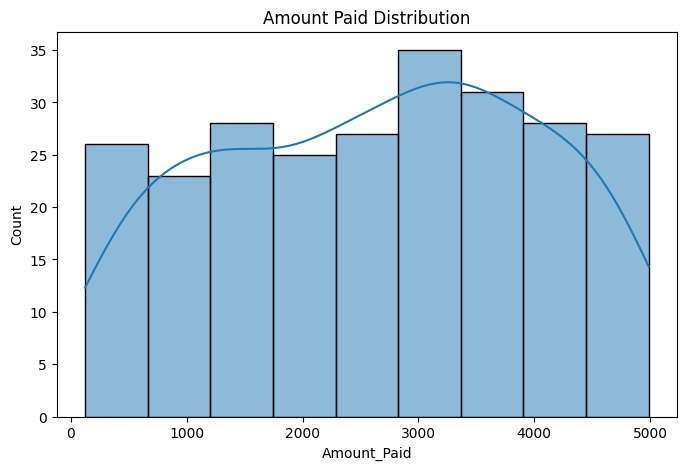

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount_Paid'], kde=True)
plt.title("Amount Paid Distribution")
plt.show()


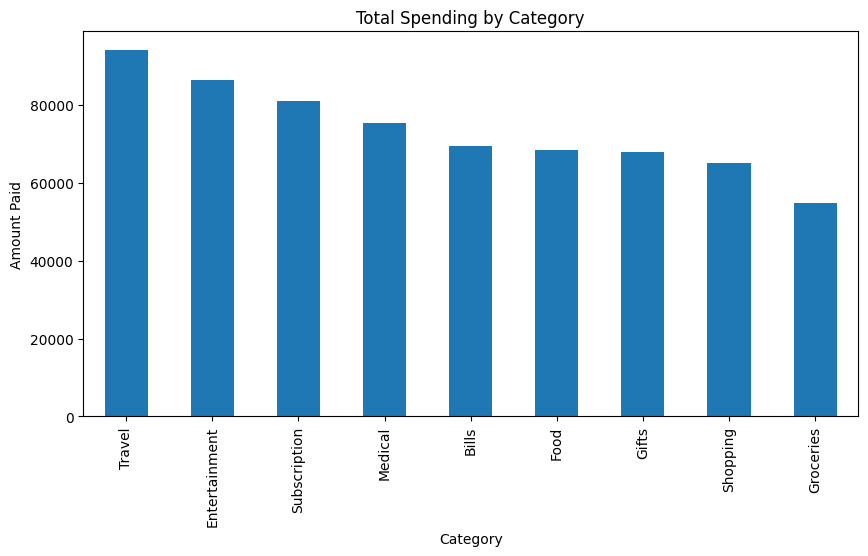

In [ ]:
cat_spend = df.groupby("Category")["Amount_Paid"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
cat_spend.plot(kind='bar')
plt.title("Total Spending by Category")
plt.ylabel("Amount Paid")
plt.show()


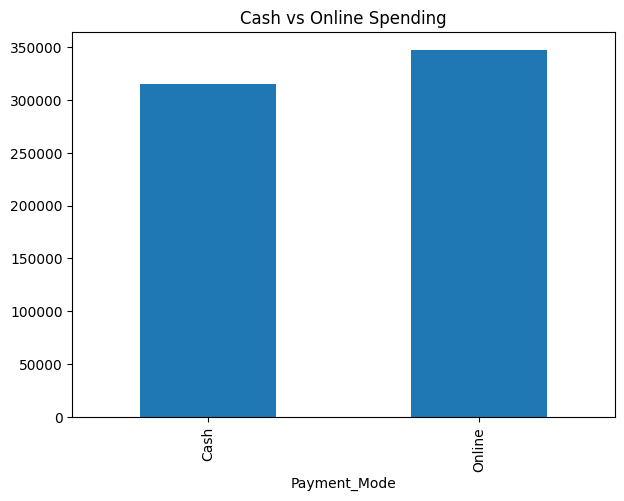

In [ ]:
pm_spend = df.groupby("Payment_Mode")["Amount_Paid"].sum()

plt.figure(figsize=(7,5))
pm_spend.plot(kind='bar')
plt.title("Cash vs Online Spending")
plt.show()


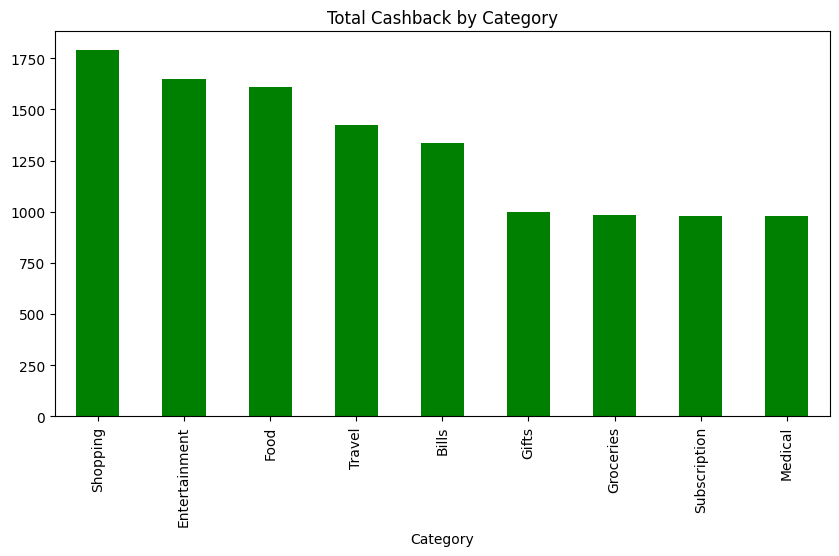

In [ ]:
cashback_cat = df.groupby("Category")["Cashback"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
cashback_cat.plot(kind='bar', color='green')
plt.title("Total Cashback by Category")
plt.show()


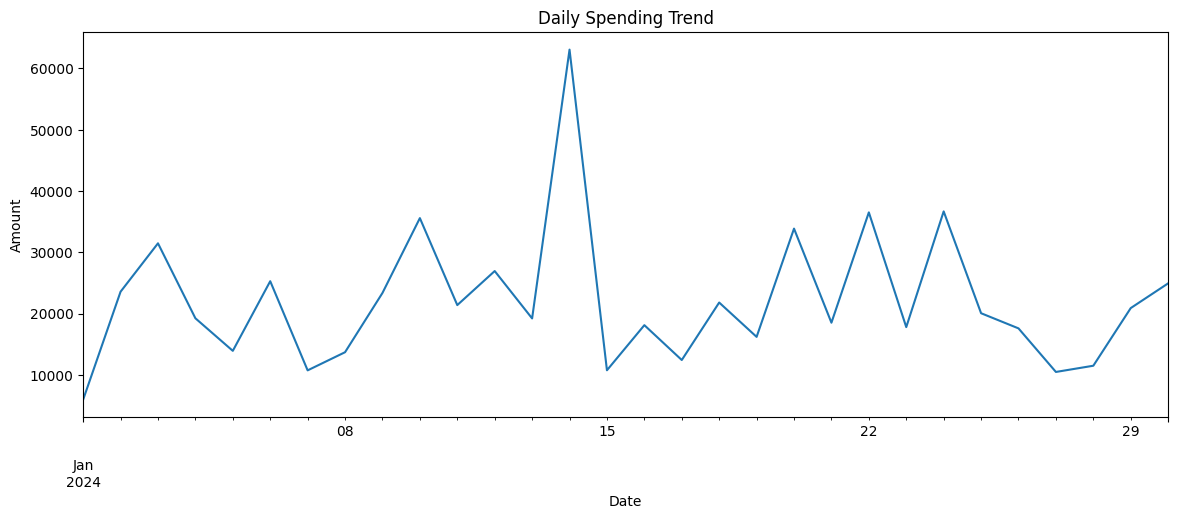

In [ ]:
daily = df.groupby("Date")["Amount_Paid"].sum()

plt.figure(figsize=(14,5))
daily.plot()
plt.title("Daily Spending Trend")
plt.ylabel("Amount")
plt.show()


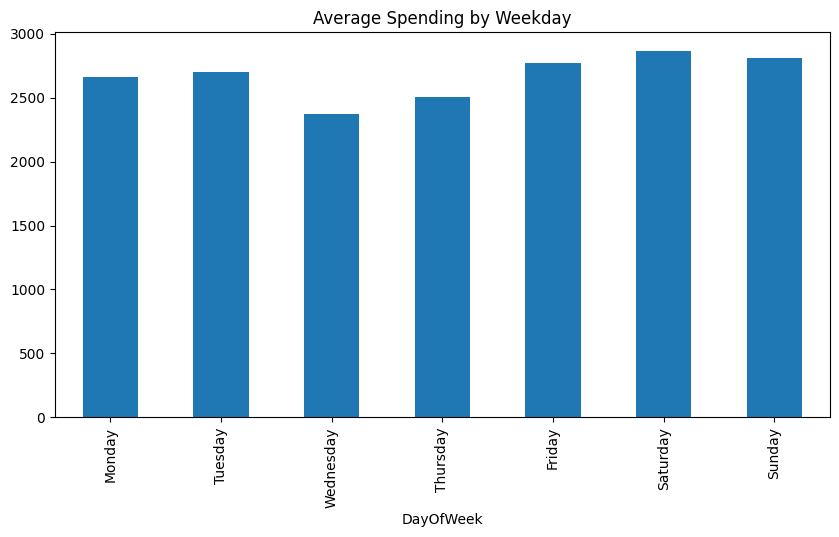

In [ ]:
weekday = df.groupby("DayOfWeek")["Amount_Paid"].mean()

plt.figure(figsize=(10,5))
weekday.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]).plot(kind='bar')
plt.title("Average Spending by Weekday")
plt.show()


In [ ]:
df.nlargest(10, "Amount_Paid")


,Date,Category,Payment_Mode,Description,Amount_Paid,Cashback,Net_Amount,Day,Month,DayOfWeek
194,2024-01-24,Bills,Online,Firm financial huge.,4987.26,86.79,4900.47,24,January,Wednesday
15,2024-01-22,Medical,Online,Seven medical blood personal success medical c...,4948.14,136.92,4811.22,22,January,Monday
230,2024-01-10,Entertainment,Cash,Ago listen whose situation simply officer retu...,4944.66,13.72,4930.94,10,January,Wednesday
187,2024-01-16,Medical,Online,Simply down business draw.,4942.65,99.07,4843.58,16,January,Tuesday
143,2024-01-04,Shopping,Online,Result Democrat later direction fund law indeed.,4903.53,59.25,4844.28,4,January,Thursday
31,2024-01-02,Subscription,Cash,Me system church whether bag control organizat...,4891.02,25.68,4865.34,2,January,Tuesday
72,2024-01-19,Bills,Cash,Sing clearly find official.,4882.22,176.28,4705.94,19,January,Friday
71,2024-01-26,Entertainment,Online,Charge call prove nor design record short cold.,4870.49,185.15,4685.34,26,January,Friday
175,2024-01-21,Travel,Cash,Behavior provide meet adult final week game.,4867.08,141.96,4725.12,21,January,Sunday
8,2024-01-20,Gifts,Cash,Play move each left establish understand read ...,4866.92,0.00,4866.92,20,January,Saturday


In [ ]:
print("Total Spending:", df['Amount_Paid'].sum())
print("Total Cashback:", df['Cashback'].sum())
print("Net Spending:", df['Net_Amount'].sum())

print("\nHighest Spending Category:")
print(df.groupby("Category")["Amount_Paid"].sum().idxmax())

print("\nMost Common Payment Mode:")
print(df['Payment_Mode'].mode()[0])


Total Spending: 662353.74
Total Cashback: 11743.54
Net Spending: 650610.2

Highest Spending Category:
Travel

Most Common Payment Mode:
Online


In [ ]:
df.to_csv("clean_expenses.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt

for i, fig in enumerate(plt.get_fignums(), start=1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", dpi=300, bbox_inches='tight')


In [ ]:
import pandas as pd
df = pd.read_csv("expenses.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'expenses.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Expense_01_2024.csv.csv to Expense_01_2024.csv.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Expense_01_2024.csv.csv")
df.head()


,Date,Category,Payment_Mode,Description,Amount_Paid,Cashback
0,1/20/2024,Travel,Cash,Score each cause.,3720.67,44.64
1,1/4/2024,Travel,Cash,Beautiful instead ahead despite measure ago cu...,2972.94,5.96
2,1/20/2024,Bills,Cash,Information last everything thank serve civil ...,2551.51,112.25
3,1/9/2024,Gifts,Online,Whatever from behavior benefit suggest.,1141.18,0.00
4,1/19/2024,Food,Cash,Role movie win.,3505.79,0.00


In [ ]:
import matplotlib.pyplot as plt

for i, fig in enumerate(plt.get_fignums(), start=1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", dpi=300, bbox_inches='tight')
